In [1]:
# Basic analysis
import numpy as np
import pandas as pd
pd.options.display.max_columns = 100 # See all of the columns when DFs are displayed

# Generate the DataFrame with the new ranking
from X_ranking import *
from priority_tools import *

# Plotting (with fancy font/backend output)
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import FormatStrFormatter
rcParams["font.family"] = "serif"
rcParams["font.serif"] = "Times New Roman"
%matplotlib inline
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = [r'\usepackage{amsmath} \usepackage{bm} \usepackage{physics}']
%config InlineBackend.figure_format = 'retina' # For high quality figures

In [2]:
# Get the inital SC3 dataframe that was used as the basis for the picks
sc3_init_df_path = 'data/TKS/tks_output/sc3_init_target_list_minTSM35_kampcut1_2020-05-09.csv'
sc3_init_df = pd.read_csv(sc3_init_df_path)
print('SC3 init df columns: {}'.format(sc3_init_df.columns.tolist()))
print('----------')

# Get the df with all of the picks
picks_df_path = 'data/TKS/tks_output/program_overlap.csv'
picks_df = pd.read_csv(picks_df_path)

selected_TOIs = pd.read_csv('data/TKS/tks_output/TOIs_perfect_final.csv')
pick_tois_df = picks_df.merge(selected_TOIs, on='tic')#.drop_duplicates(subset='tic') # Include multi planets
print('Program overlap df columns: {}'.format(picks_df.columns.tolist()))
print(len(pick_tois_df))

SC3 init df columns: ['radius_bin', 'insol_bin', 'st_Teff_bin', 'Source Pipeline', 'Full TOI ID', 'Planet Radius Value', 'Orbital Period Value', 'Effective Temperature Value', 'Effective Stellar Flux Value', 'Planet Equilibrium Temperature (K) Value', 'mass_flag', 'V mag', 'K_amp', 'TSM', 't_HIRES', 'X', 'TSM_Vmag_priority', 'X_priority', 'toi', 'tic', 'cps', 'disp', 'vetting', 'ao_vet', 'hires_prv', 'apf_prv', 'vip_rank']
----------
Program overlap df columns: ['tic', 'toi', 'priority', 'in_SC1A', 'in_SC1B', 'in_SC1C', 'in_SC1D', 'in_SC1E', 'in_SC2A', 'in_SC2Bi', 'in_SC2Bii', 'in_SC2C', 'in_SC3', 'in_SC4', 'in_TOA', 'in_TOB', 'total_programs']
85


In [42]:
pick_tois_df.columns.values

array(['tic', 'toi_x', 'priority_x', 'in_SC1A_x', 'in_SC1B_x',
       'in_SC1C_x', 'in_SC1D_x', 'in_SC1E_x', 'in_SC2A_x', 'in_SC2Bi_x',
       'in_SC2Bii_x', 'in_SC2C_x', 'in_SC3_x', 'in_SC4_x', 'in_TOA_x',
       'in_TOB_x', 'total_programs', 'toi_y', 'cps_name', 'tic_jump',
       'toi_jump', 'evol', 'source', 'disp', 'photo_vetting',
       'spec_vetting', 'ao_vetting', 'ra', 'dec', 'tmag', 'tmag_err',
       'vmag', 'jmag', 'nobs', 'last_observed', 'rms', 'errvel',
       'template', 'nobs_goal', 'tottime', 'remaining_nobs',
       'remaining_time', 'n_comments', 'last_comment', 'rs', 'rs_err',
       'r_s', 'm_s', 'teff', 'teff_err', 't_eff', 'logg', 'logg_err',
       'feh', 'ast_det_c', 'current_sectors', 'ast_det_t',
       'total_sectors', 'color', 'spectral_type', 'vsini', 'prot', 'sval',
       'logrhk', 'jitter', 'activity', 'ruwe', 'rp', 'rp_err', 'mp', 'k',
       'kerr', 'ksig', 'epoch', 'epoch_err', 'period', 'period_err',
       'duration', 'duration_err', 'b_est', 'ci

In [3]:
pick_tois_df['TSM'] = get_TSM(pick_tois_df['rp'], 
                              pick_tois_df['rs'], 
                              pick_tois_df['teff'], 
                              pick_tois_df['jmag'], 
                              pick_tois_df['mp'], 
                              pick_tois_df['a_to_R'])

pick_tois_df['t_HIRES'] = t_HIRES_plavchan(pick_tois_df['vmag'], 250, pick_tois_df['k'])

pick_tois_df['X'] = pick_tois_df['TSM'] / pick_tois_df['t_HIRES']

In [4]:
# Get just the targets picked by SC3
sc3_picks_df = picks_df[picks_df['in_SC3'] == 'X']
sc3_picks_df.head()

,tic,toi,priority,in_SC1A,in_SC1B,in_SC1C,in_SC1D,in_SC1E,in_SC2A,in_SC2Bi,in_SC2Bii,in_SC2C,in_SC3,in_SC4,in_TOA,in_TOB,total_programs
0,232540264,1247,1,-,X,-,-,X,X,-,X,-,X,-,-,X,6
1,317548889,480,2,-,X,-,-,X,-,-,X,-,X,X,-,X,6
4,188768068,1462,5,-,X,X,-,X,X,-,X,-,X,X,-,X,8
9,37749396,260,10,X,X,-,-,X,-,-,X,-,X,-,-,X,6
10,31374837,431,11,X,X,X,-,X,-,-,X,-,X,-,-,X,7


In [5]:
# Merge the sc3_init_df with sc3_picks_df
sc3_df = sc3_init_df.merge(sc3_picks_df.drop(['toi'], axis=1), on='tic').rename({'priority':'pick_num'}, axis=1)
sc3_df.head()

,radius_bin,insol_bin,st_Teff_bin,Source Pipeline,Full TOI ID,Planet Radius Value,Orbital Period Value,Effective Temperature Value,Effective Stellar Flux Value,Planet Equilibrium Temperature (K) Value,mass_flag,V mag,K_amp,TSM,t_HIRES,X,TSM_Vmag_priority,X_priority,toi,tic,cps,disp,vetting,ao_vet,hires_prv,apf_prv,vip_rank,pick_num,in_SC1A,in_SC1B,in_SC1C,in_SC1D,in_SC1E,in_SC2A,in_SC2Bi,in_SC2Bii,in_SC2C,in_SC3,in_SC4,in_TOA,in_TOB,total_programs
0,2,3,2,spoc,260.01,1.637881,13.470018,4111.00,11.138650,465.937745,0.0,9.90000,1.199958,71.235452,7693.050436,0.009260,NaN,3.0,260.01,37749396,HIP1532,CPC,passed,passed,NaN,NaN,NaN,10,X,X,-,-,X,-,-,X,-,X,-,-,X,6
1,2,3,3,spoc,1434.01,2.029456,29.889399,5393.86,12.020798,474.900993,0.0,8.78000,1.029344,71.529613,3726.574039,0.019194,1.0,2.0,1434.01,138588540,102121,PC,passed,passed,yes - low cadence,yes,NaN,30,X,X,-,-,X,X,-,X,-,X,-,-,X,7
2,2,3,3,spoc,1742.01,2.196405,21.272109,5707.00,55.704942,696.775997,0.0,8.86300,1.248852,40.942313,2732.806192,0.014982,NaN,4.0,1742.01,219857012,156141,PC,passed,NaN,NaN,yes,NaN,44,-,X,-,-,X,X,-,X,-,X,-,-,X,6
3,2,4,3,spoc,1726.01,2.158585,7.108153,5694.11,145.564668,885.898044,0.0,6.92035,1.758848,212.598959,230.204665,0.923522,1.0,1.0,1726.01,130181866,63433,P,passed,NaN,yes,yes,NaN,31,X,X,-,-,X,-,-,X,-,X,-,-,X,6
4,3,3,3,spoc,1726.02,2.635970,20.545913,5694.11,35.353393,621.909976,0.0,6.92035,1.734137,193.511870,236.812228,0.817153,1.0,1.0,1726.02,130181866,63433,P,passed,NaN,yes,yes,NaN,31,X,X,-,-,X,-,-,X,-,X,-,-,X,6


In [6]:
# Save the above dataframe to file
# sc3_df.to_csv('data/TKS/tks_output/sc3_output_df.csv', index=False)

In [7]:
rad_bins = 10**(np.linspace(0,1,6)) 
rad_bins[-1] = 11.2 #want to include up to Jupiter radius 
fpl_bins = 10**(np.linspace(-1,4,6))
tef_bins = np.array([2500,3900,5200,6500])
bins = [rad_bins, fpl_bins, tef_bins]

fig_ax_list = []
for i in np.arange(1,6):
    curr_fig_ax = bin_plotter(sc3_df.set_index(['radius_bin', 'insol_bin', 'st_Teff_bin']).rename(columns={'X_priority':'priority'}),bins,i)
    fig_ax_list.append(curr_fig_ax)

KeyError: 1

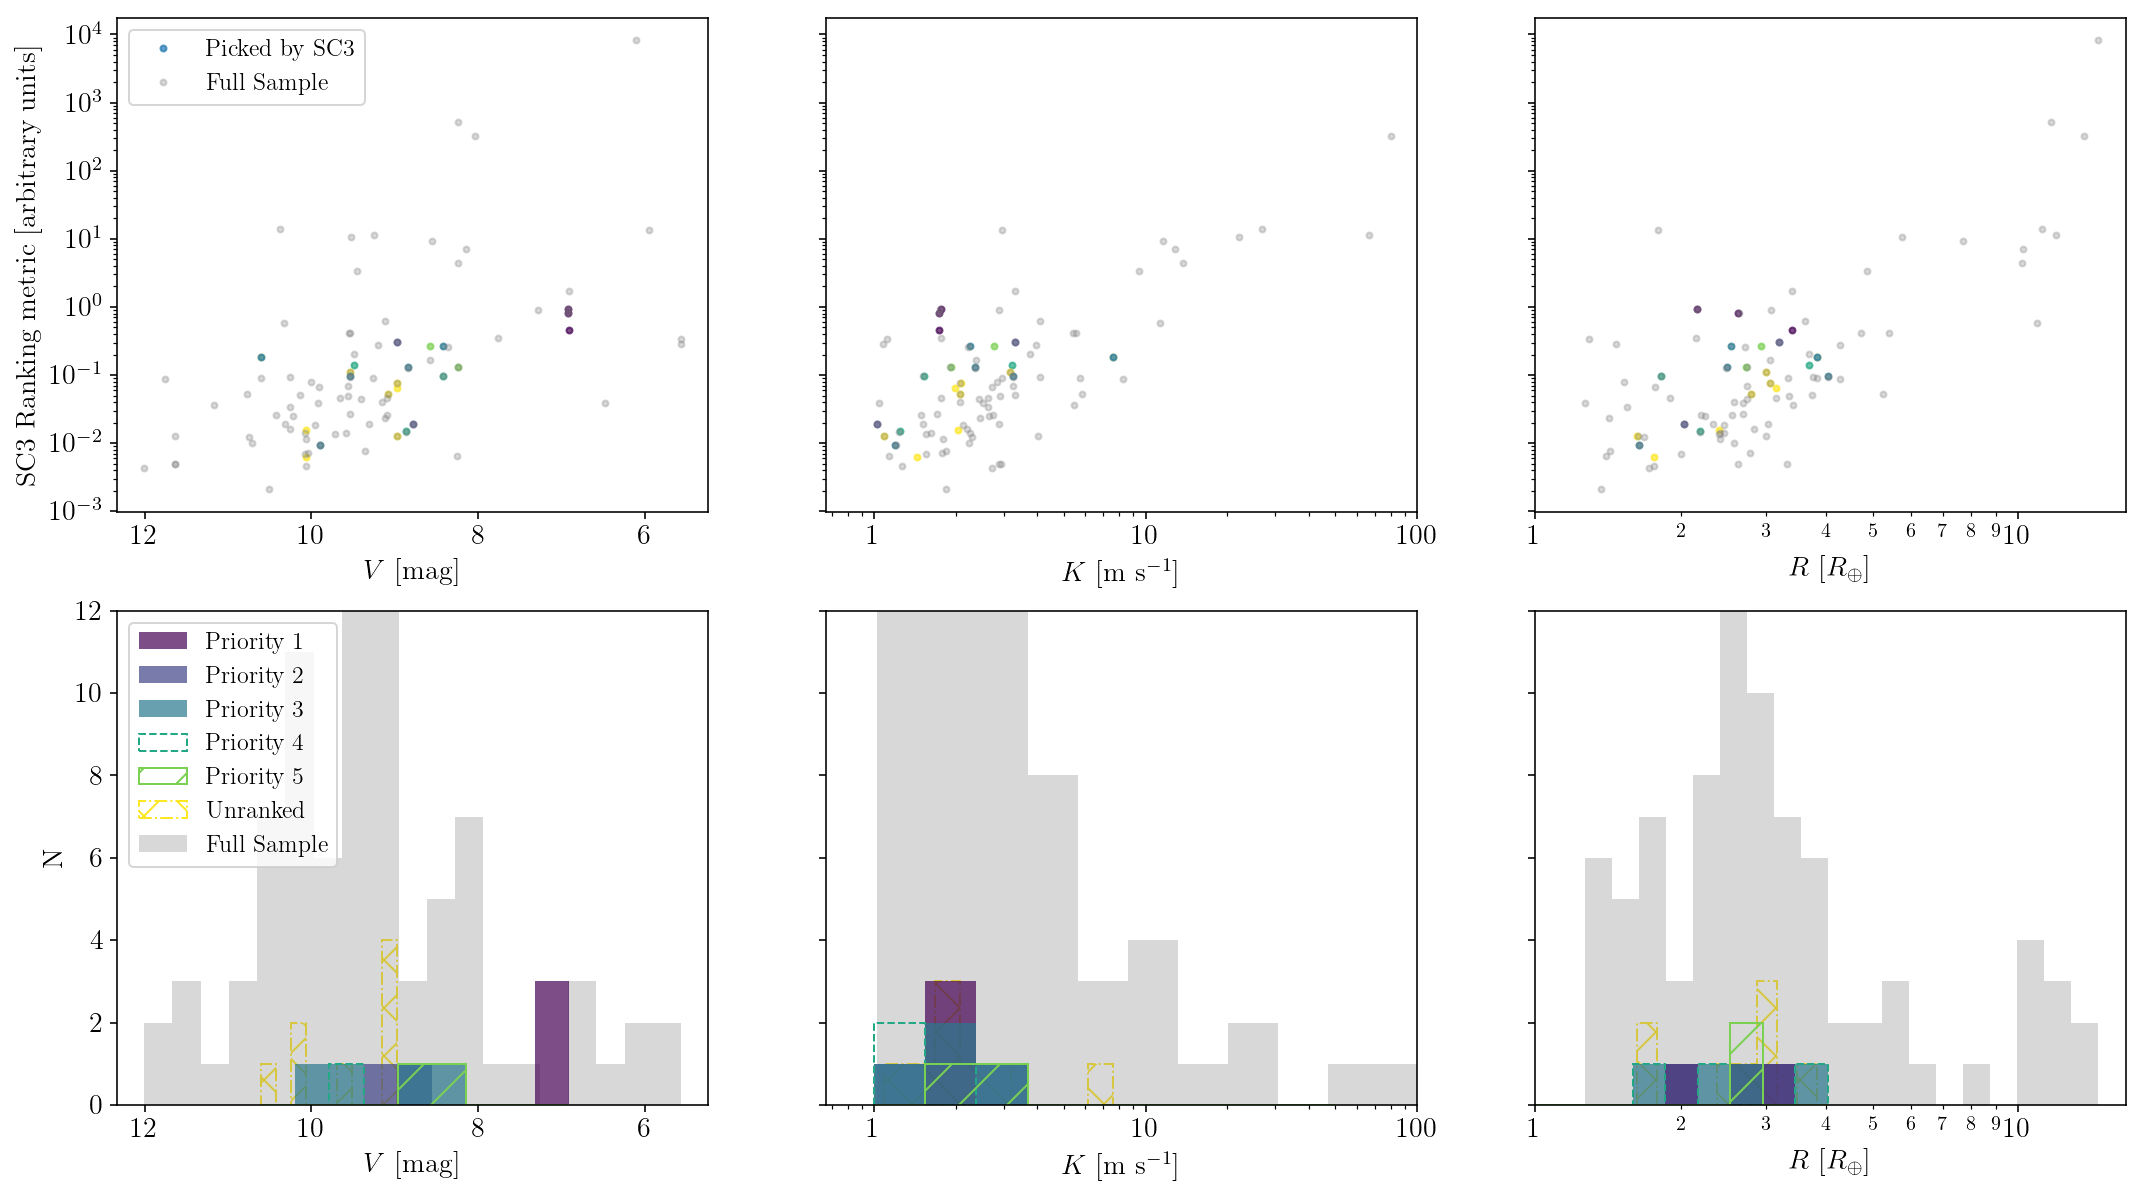

In [9]:
benchmarks = sc3_df['Full TOI ID'].values #[455.01, 509.01, 1136.01, 1339.01, 1728.01]
fig, axes, colors = summary_plot(sc3_df, pick_tois_df, benchmark_targets=benchmarks)
ax_X_vmag = axes[0,0]
ax_X_vmag.set_ylabel('SC3 Ranking metric [arbitrary units]', fontsize=14)

# Plot the distribution of all of the unranked TOIs
unranked_df = sc3_df[pd.isnull(sc3_df['X_priority'])]
_, __, ___, ax_p_vmag, ax_p_kamp, ax_p_rad = axes.flatten()
hist_axes = [ax_p_vmag, ax_p_kamp, ax_p_rad]
hist_keys = ['V mag', 'K_amp', 'Planet Radius Value']
for ax,key in zip(hist_axes, hist_keys):
    hist_bin_num = 10
    bins = None
    if key == 'V mag':
        bins = np.linspace(unranked_df[key].min(), unranked_df[key].max(), hist_bin_num)
    else:
        bins = np.logspace(np.log10(unranked_df[key].min()), np.log10(unranked_df[key].max()), hist_bin_num)
    ax.hist(unranked_df[key], bins=bins, zorder=0, alpha=1.0, histtype='step', linestyle='-.', hatch='x', color=colors[-1], label='Unranked'.format(len(unranked_df)))
    if key == 'V mag':
        ax.legend(fancybox=True, fontsize=12)

hist_keys = ['vmag', 'k', 'rp']
for ax,key in zip(hist_axes, hist_keys):
    hist_bin_num = 20
    bins = None
    if key == 'vmag':
        bins = np.linspace(pick_tois_df[key].min(), pick_tois_df[key].max(), hist_bin_num)
    else:
        bins = np.logspace(np.log10(pick_tois_df[key].min()), np.log10(pick_tois_df[key].max()), hist_bin_num)
    ax.hist(pick_tois_df[key], bins=bins, zorder=0, alpha=0.3, histtype='stepfilled', color='gray', label='Full Sample')
    
    if key == 'vmag':
        ax.legend(fancybox=True, fontsize=12, loc='upper left')
        
    if key == 'k': 
        ax.set_xlim(right=10**2)
        ax.set_ylim(top=12)
        
    if key == 'rp':
        ax.set_xlim(left=1)
        ax.xaxis.set_minor_formatter(FormatStrFormatter('%d'))
# fig.savefig('plots/sc3_summary_plot_new_filter_order_no_annotation.pdf')
plt.show()

In [26]:
for i, fig_ax in enumerate(fig_ax_list):
    fig, ax = fig_ax
    ax.set_ylabel('Stellar Effective Temperature [K]', fontsize=14)
    ax.set_xlabel(r'Insolation Flux [F$_\oplus$]', fontsize=14)
    ax.tick_params(axis='both', labelsize=14)
    
    # To plot foo points for the legend
    ax.set_xlim(ax.get_xlim())
    ax.set_ylim(ax.get_ylim())
    ax.scatter(0, 0, color='green', label='Priority 1')
    ax.scatter(0, 0, color='yellow', label='Priority 2')
    ax.scatter(0, 0, color='orange', label='Priority 3')
    ax.scatter(0, 0, color='black', label='Unranked')
    ax.legend(fancybox=True, fontsize=14)
    
    # fig.savefig('plots/sc3_binning_radius_bin_{}.png'.format(i+1), dpi=400)
    break